In [1]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
!pip install ppscore


In [2]:
df0 = pd.read_csv('Copy of Regrerssion_energy_production_data (2).csv', delimiter=';')
df0

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [3]:
df0.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [4]:
df0.shape

(9568, 5)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df0.duplicated().sum()

41

In [7]:
df0 = df0.drop_duplicates()


In [8]:
new_count = df0.shape[0]
print(f"Remaining rows: {new_count}")


Remaining rows: 9527


In [9]:
for col in df0.columns:
  print(f'{col} : {df0[col].nunique()}')
print('-----------------------------------------------------')

for col in df0.columns:
  print('Column :', col)
  print(df0[col].value_counts())
  print()

temperature : 2773
exhaust_vacuum : 634
amb_pressure : 2517
r_humidity : 4546
energy_production : 4836
-----------------------------------------------------
Column : temperature
25.21    13
13.78    12
24.43    11
23.48    10
24.27    10
         ..
12.92     1
20.43     1
12.01     1
2.64      1
11.81     1
Name: temperature, Length: 2773, dtype: int64

Column : exhaust_vacuum
70.32    61
51.43    47
45.01    46
68.08    45
66.54    44
         ..
57.35     1
76.16     1
61.85     1
44.37     1
56.24     1
Name: exhaust_vacuum, Length: 634, dtype: int64

Column : amb_pressure
1013.88    16
1010.99    15
1007.99    14
1013.23    14
1013.02    14
           ..
1002.67     1
1001.37     1
1006.51     1
1004.94     1
1002.74     1
Name: amb_pressure, Length: 2517, dtype: int64

Column : r_humidity
100.09    26
82.80     10
85.23      8
77.00      8
73.67      8
          ..
49.28      1
48.72      1
73.97      1
94.60      1
63.67      1
Name: r_humidity, Length: 4546, dtype: int64

Colum

In [10]:
print('No. of Duplicate Records =',df0.duplicated().sum())

No. of Duplicate Records = 0


In [11]:
duplicated_rows = df0[df0.duplicated()]
print(duplicated_rows)


Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []


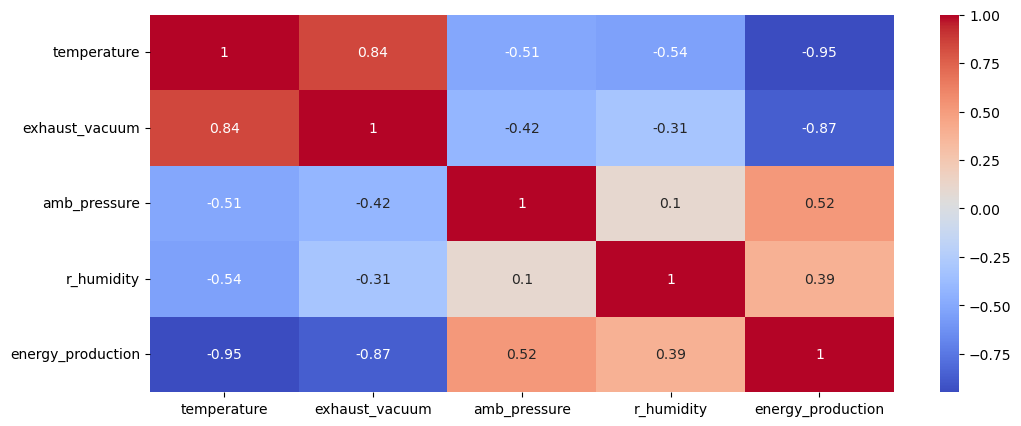

In [12]:
plt.figure(figsize=(12,5), dpi = 100)
corr = df0.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<Figure size 864x432 with 0 Axes>

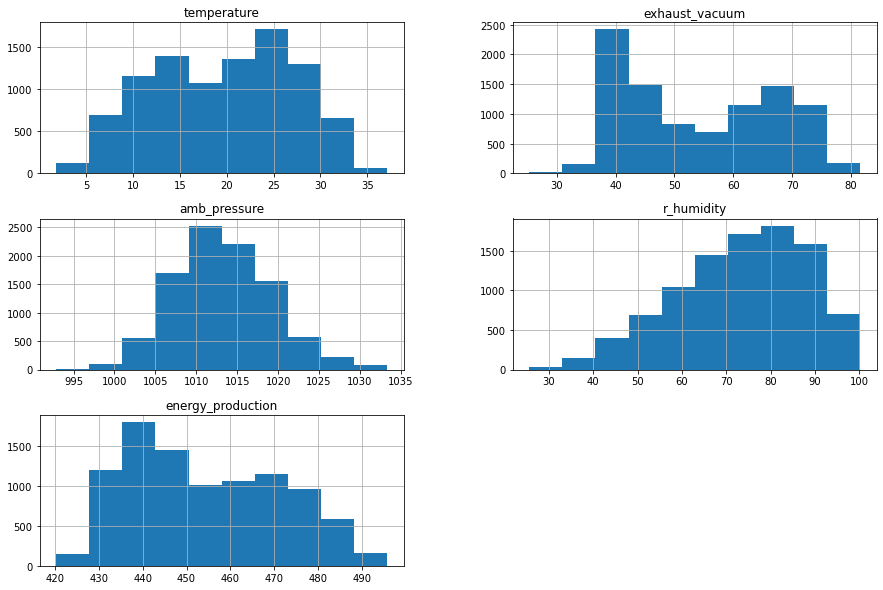

In [13]:
plt.figure(figsize=(12, 6))
df0.hist(figsize=(15,10))
plt.show()

In [14]:
df0['temperature'].value_counts()

25.21    13
13.78    12
24.43    11
23.48    10
24.27    10
         ..
12.92     1
20.43     1
12.01     1
2.64      1
11.81     1
Name: temperature, Length: 2773, dtype: int64

In [15]:
df0['exhaust_vacuum'].value_counts()

70.32    61
51.43    47
45.01    46
68.08    45
66.54    44
         ..
57.35     1
76.16     1
61.85     1
44.37     1
56.24     1
Name: exhaust_vacuum, Length: 634, dtype: int64

In [16]:
df0['amb_pressure'].value_counts()

1013.88    16
1010.99    15
1007.99    14
1013.23    14
1013.02    14
           ..
1002.67     1
1001.37     1
1006.51     1
1004.94     1
1002.74     1
Name: amb_pressure, Length: 2517, dtype: int64

In [17]:
df0['r_humidity'].value_counts()

100.09    26
82.80     10
85.23      8
77.00      8
73.67      8
          ..
49.28      1
48.72      1
73.97      1
94.60      1
63.67      1
Name: r_humidity, Length: 4546, dtype: int64

In [18]:
df0['energy_production'].value_counts()

468.80    9
442.78    8
447.06    8
434.01    8
466.20    7
         ..
427.15    1
431.46    1
489.04    1
431.21    1
421.57    1
Name: energy_production, Length: 4836, dtype: int64

In [19]:
df0.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [20]:
has_null = df0.isnull().values.any()
print(has_null)


False


In [21]:
import ppscore as pps

pp = pps.matrix(df0)
print(pp)

                    x                  y   ppscore            case  \
0         temperature        temperature  1.000000  predict_itself   
1         temperature     exhaust_vacuum  0.494432      regression   
2         temperature       amb_pressure  0.000000      regression   
3         temperature         r_humidity  0.000000      regression   
4         temperature  energy_production  0.654677      regression   
5      exhaust_vacuum        temperature  0.651725      regression   
6      exhaust_vacuum     exhaust_vacuum  1.000000  predict_itself   
7      exhaust_vacuum       amb_pressure  0.707706      regression   
8      exhaust_vacuum         r_humidity  0.243824      regression   
9      exhaust_vacuum  energy_production  0.727989      regression   
10       amb_pressure        temperature  0.029599      regression   
11       amb_pressure     exhaust_vacuum  0.037393      regression   
12       amb_pressure       amb_pressure  1.000000  predict_itself   
13       amb_pressur

In [22]:
from scipy import stats

z_scores = stats.zscore(df0.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
print(df0[outliers])


      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
30          33.94           74.67       1015.94       28.16             427.98
38           9.95           41.82       1033.09       69.44             477.52
233         34.65           74.67       1016.03       26.67             427.69
315         14.46           42.86       1031.34       69.84             464.44
385         14.20           42.86       1031.96       69.59             468.63
400         35.01           74.67       1016.10       26.30             428.48
426          9.06           40.02       1031.16       82.04             478.01
534          8.96           40.02       1031.21       82.32             475.47
835          8.87           41.82       1033.30       74.28             477.97
922          8.53           40.02       1031.27       85.57             476.73
1154        34.30           74.67       1015.98       25.89             427.84
1166         7.64           40.02       1031.58     

In [23]:
Q1 = df0.quantile(0.25)
Q3 = df0.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df0 < (Q1 - 1.5 * IQR)) | (df0 > (Q3 + 1.5 * IQR))).any(axis=1)
print(df0[outliers])


      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
30          33.94           74.67       1015.94       28.16             427.98
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
233         34.65           74.67       1016.03       26.67             427.69
315         14.46           42.86       1031.34       69.84             464.44
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48             485.11
9331         5.97           36.25       1029.65       86.74             487.03
9368        14.31           42.86       1031.14       69.60             465.36
9501        12.02           41.92       1030.10       84.45             465.82

[104 rows x 5 columns]


In [24]:
# Assuming 'outliers' is a boolean mask
df0 = df0[~outliers]  # Keep only the non-outlier rows
df0


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [25]:
print(df0.describe())

       temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9423.000000     9423.000000   9423.000000  9423.000000   
mean     19.728498       54.404751   1013.125097    73.348106   
std       7.415999       12.678711      5.698357    14.552445   
min       1.810000       25.360000    997.340000    31.290000   
25%      13.610000       41.760000   1009.070000    63.325000   
50%      20.510000       52.720000   1012.880000    75.010000   
75%      25.760000       66.540000   1017.090000    84.850000   
max      35.770000       81.560000   1029.360000   100.160000   

       energy_production  
count        9423.000000  
mean          454.174236  
std            16.996007  
min           420.260000  
25%           439.695000  
50%           451.200000  
75%           468.095000  
max           495.760000  


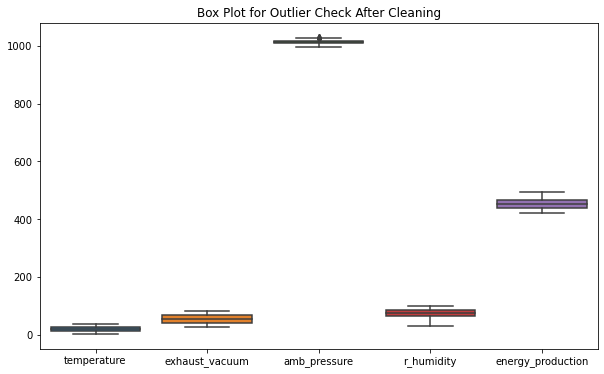

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df0)
plt.title("Box Plot for Outlier Check After Cleaning")
plt.show()


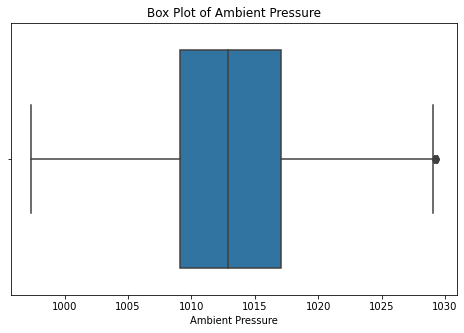

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df0['amb_pressure'])
plt.title("Box Plot of Ambient Pressure")
plt.xlabel("Ambient Pressure")
plt.show()


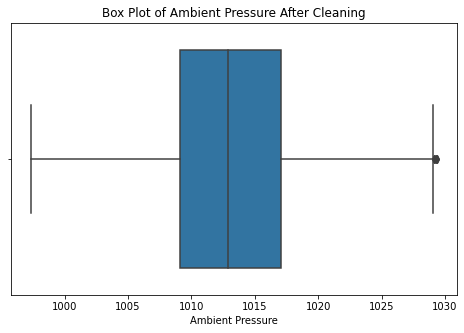

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df0['amb_pressure'])
plt.title("Box Plot of Ambient Pressure After Cleaning")
plt.xlabel("Ambient Pressure")
plt.show()


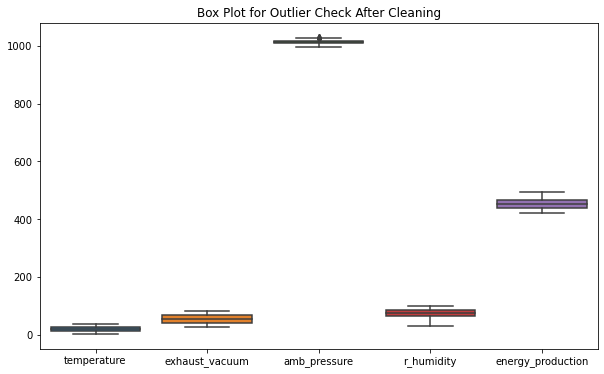

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df0)
plt.title("Box Plot for Outlier Check After Cleaning")
plt.show()


In [30]:
df0

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


# Model Building:-

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import r2_score, classification_report, mean_squared_error

In [32]:
target= df0[['energy_production']]
target

,energy_production
0,481.30
1,465.36
2,465.48
3,467.05
4,463.58
...,...
9563,457.32
9564,446.92
9565,429.34
9566,421.57


In [33]:
feature= df0.drop('energy_production', axis=1)
feature

,temperature,exhaust_vacuum,amb_pressure,r_humidity
0,9.59,38.56,1017.01,60.10
1,12.04,42.34,1019.72,94.67
2,13.87,45.08,1024.42,81.69
3,13.72,54.30,1017.89,79.08
4,15.14,49.64,1023.78,75.00
...,...,...,...,...
9563,17.10,49.69,1005.53,81.82
9564,24.73,65.34,1015.42,52.80
9565,30.44,56.24,1005.19,56.24
9566,23.00,66.05,1020.61,80.29


In [34]:
x_train,x_test,y_train,y_test= train_test_split(feature, target, train_size=0.80, random_state=45)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7538, 4)
(1885, 4)
(7538, 1)
(1885, 1)


# Linear Regression:-

In [36]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_pred= lin_model.predict(x_test)
score_lin_model= r2_score(y_test,y_pred)
mse_lin_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score of given data using Linear Regrresion is: {score_lin_model:.2f}')
print(f'Mean Squared Error of given data using Linear Regression is: {mse_lin_model:.2f}')

Accuracy score of given data using Linear Regrresion is: 0.93
Mean Squared Error of given data using Linear Regression is: 20.86


# Lasso Regressor:-

In [37]:
lasso_model= Lasso()
lasso_model.fit(x_train,y_train)
y_pred= lasso_model.predict(x_test)
score_lasso_model= r2_score(y_test,y_pred)
mse_lasso_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score for the given data by using Lasso Regression is: {score_lasso_model:.2f}')
print(f'Mean Squared Error for the given data by using Lasso Regression is: {mse_lasso_model:.2f}')

Accuracy score for the given data by using Lasso Regression is: 0.93
Mean Squared Error for the given data by using Lasso Regression is: 20.88


# Decision Tree Regressor:-

In [38]:
dec_tree= DecisionTreeRegressor()
dec_tree.fit(x_train,y_train)
y_pred= dec_tree.predict(x_test)
score_dec_tree= r2_score(y_test,y_pred)
mse_dec_tree= mean_squared_error(y_test,y_pred)
print(f'Accuracy score for the given data by using Decision Tree Regressor is: {score_dec_tree:.2f}')
print(f'Mean Squared Error for the given data by using Decision Tree Regressor is: {mse_dec_tree:.2f}')

Accuracy score for the given data by using Decision Tree Regressor is: 0.93
Mean Squared Error for the given data by using Decision Tree Regressor is: 20.25


# Support Vector Regressor:-

In [39]:
svr_model= SVR()
svr_model.fit(x_train,y_train)
y_pred= svr_model.predict(x_test)
score_svr_model= r2_score(y_test,y_pred)
mse_svr_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score for given data by using Support Vector Regressor is: {score_svr_model:.2f}')
print(f'Mean Square Error for the given data by using Support Vetctor Regressor is: {mse_svr_model:.2f}')

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score for given data by using Support Vector Regressor is: 0.38
Mean Square Error for the given data by using Support Vetctor Regressor is: 174.95


# Random Forest Regressor:-

In [40]:
random_model= RandomForestRegressor()
random_model.fit(x_train,y_train)
y_pred= random_model.predict(x_test)
score_random_model= r2_score(y_test,y_pred)
mse_random_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score for given data by using Random Forest Regressor is: {score_random_model:.2f}')
print(f'Mean Square Error for the given data by using Random Forest Regressor is: {mse_random_model:.2f}')

C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_13020\2462478879.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(x_train,y_train)


Accuracy score for given data by using Random Forest Regressor is: 0.96
Mean Square Error for the given data by using Random Forest Regressor is: 10.99


# Gradient Boosting Regressor:-

In [41]:
gradient_model= GradientBoostingRegressor()
gradient_model.fit(x_train,y_train)
y_pred= gradient_model.predict(x_test)
score_gradient_model= r2_score(y_test,y_pred)
mse_gradient_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score for the given data by using Gradient Boosting Regressor is: {score_gradient_model:.2f}')
print(f'Mean Square Error for the given data by using Gradient Boosting Regressor is: {mse_gradient_model:.2f}')

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score for the given data by using Gradient Boosting Regressor is: 0.94
Mean Square Error for the given data by using Gradient Boosting Regressor is: 15.56


# Bagging Regressor:-

In [42]:
bag_model= BaggingRegressor()
bag_model.fit(x_train,y_train)
y_pred= bag_model.predict(x_test)
score_bag_model= r2_score(y_test,y_pred)
mse_bag_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score for the given data by using Bagging Regressor is: {score_bag_model:.2f}')
print(f'Mean Squared Error for the given data by using Bagging Regressor is: {mse_bag_model:.2f}')

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Accuracy score for the given data by using Bagging Regressor is: 0.96
Mean Squared Error for the given data by using Bagging Regressor is: 12.13


# Model Evaluation:-

In [43]:
evaluation= {'Model': ['Linear Regression', 'Lasso Regressor', 'Decision Tree Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'Bagging Regressor'],
            'Accuracy Score(%)': [score_lin_model,score_lasso_model,score_dec_tree,score_svr_model,score_random_model,score_gradient_model,score_bag_model],
            'MSE': [mse_lin_model,mse_lasso_model,mse_dec_tree,mse_svr_model,mse_random_model,mse_gradient_model,mse_bag_model]}

table= pd.DataFrame(evaluation)
table

,Model,Accuracy Score(%),MSE
0,Linear Regression,0.925891,20.856086
1,Lasso Regressor,0.925818,20.876654
2,Decision Tree Regressor,0.928043,20.250488
3,Support Vector Regressor,0.378349,174.948292
4,Random Forest Regressor,0.960934,10.994066
5,Gradient Boosting Regressor,0.944705,15.561470
6,Bagging Regressor,0.956904,12.128340


In [44]:
random_model.fit(x_train,y_train)
y_pred=random_model.predict(x_test)
score_random_model= r2_score(y_test,y_pred)
mse_random_model= mean_squared_error(y_test,y_pred)
print(f'Accuracy score of the given data by using Support Vector Regreesor is: {score_random_model:.2f}')
print(f'Mean Square Error of the given data by using Support Vector Regressor is: {mse_random_model:.2f}')


C:\Users\Indranil Joshi\AppData\Local\Temp\ipykernel_13020\779111930.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(x_train,y_train)


Accuracy score of the given data by using Support Vector Regreesor is: 0.96
Mean Square Error of the given data by using Support Vector Regressor is: 11.02
